# PD3
Krzysztof Wolny  
12.04.2021

In [51]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [52]:
# read data
australia = pd.read_csv('australia.csv')
australia.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


##### Kolumny:
- **MinTemp** - Minimalna temperatura [C]
- **MaxTemp** - Maksymalna temperatura [C]
- **Rainfall** - Suma opadów [mm]
- **Evaporation** - Miara odparowywania [mm]
- **Sunshine** - Suma czasu nasłonecznienia [h]
- **WindGustSpeed** - Najwyższa prędkość wiatru [km/h]
- **WindSpeed9am** - Prędkość wiatru o 9:00 [km/h]
- **WindSpeed3pm** - Prędkość wiatru o 15:00 [km/h]
- **Humidity9am** - Wilgotność o 9:00 [%]
- **Humidity3pm** - Wilgotność o 15:00 [%]
- **Pressure9am** - Ciśnienie atmosferyczne o 9:00 [hPa]
- **Pressure3pm** - Ciśnienie atmosferyczne o 15:00 [hPa]
- **Cloud9am** - Zachmurzenie o 9:00 [skala: 0 - słońce, 8 - całkowite zachmurzenie]
- **Cloud3pm** - Zachmurzenie o 15:00 [skala: 0 - słońce, 8 - całkowite zachmurzenie]
- **Temp9am** - Temperatura o 9:00 [C]
- **Temp3pm** - Temperatura o 15:00 [C]
- **RainToday** - Czy dzisiaj padał deszcz [0 - nie, 1 - tak]
-  **Zmienna celu:** **RainTomorrow** - Czy jutro będzie padał deszcz [0 - nie, 1 - tak]

In [53]:
australia.shape[0]

56420

In [54]:
australia['RainTomorrow']

0        0
1        0
2        0
3        0
4        0
        ..
56415    0
56416    0
56417    0
56418    0
56419    0
Name: RainTomorrow, Length: 56420, dtype: int64

In [55]:
np.unique(australia['RainTomorrow'])

array([0, 1])

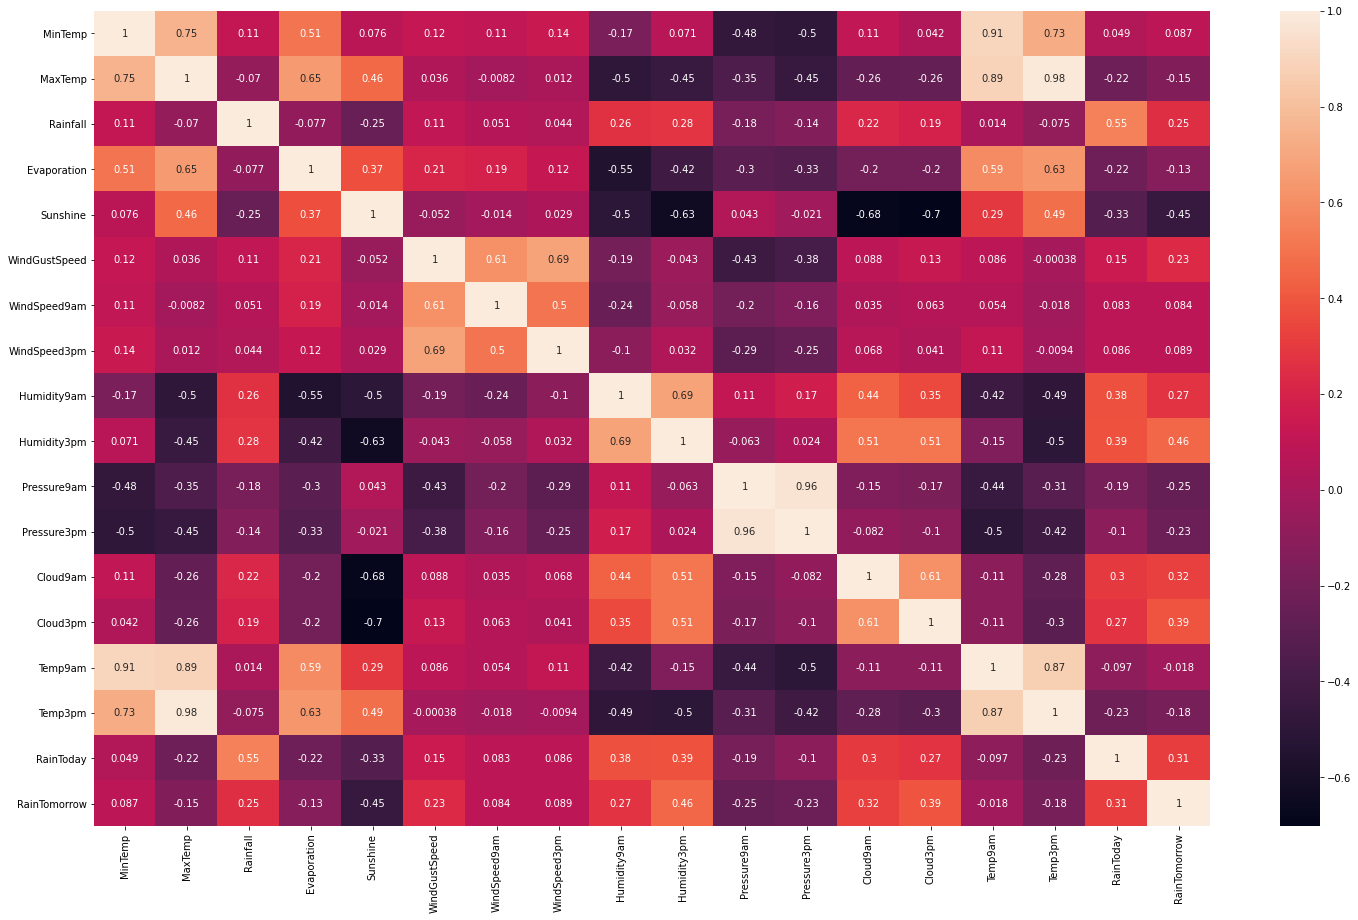

In [56]:
# Correlation matrix
plt.figure(figsize=(25,15))
corrMatrix = australia.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Jak widać na wykresie 'RainTomorrow' nie jest dobrze skorelowane z żadną zmienną. Korelacje nigdy nie przekracza 0.5 (jest mniejsza niż -0.5). 

## Train Test split

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(australia.drop("RainTomorrow", axis=1), 
                                                    australia["RainTomorrow"], 
                                                    test_size=0.3, random_state=42)

## Klasyfikatory

### Regresja logarytmiczna

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000, warm_start=True)

lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8551341131986293

### Drzewo decyzyjne

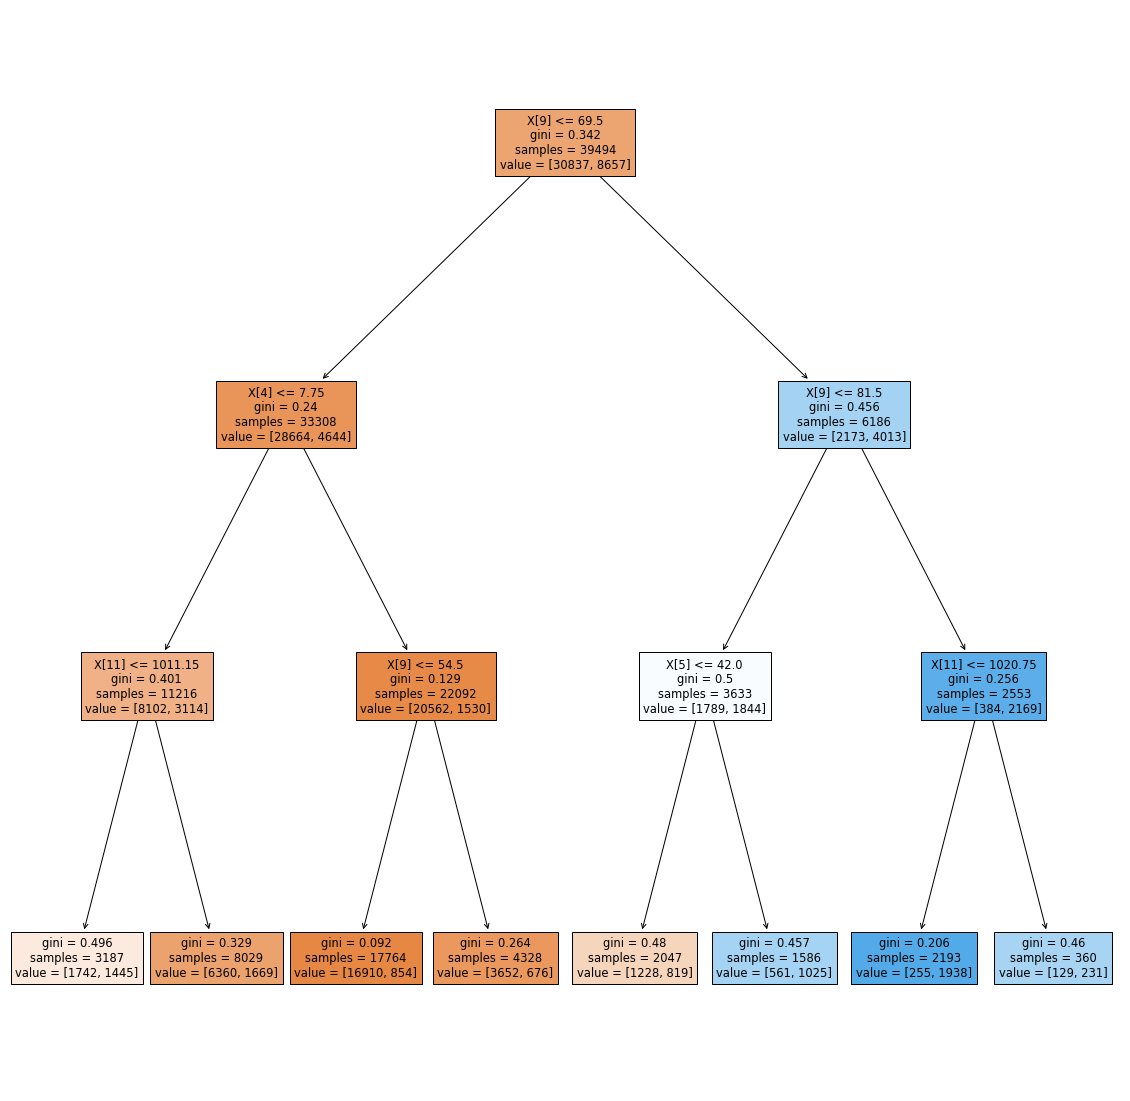

In [59]:
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_graphviz
## biblioteka poniżej może być problematyczna na Windows
import graphviz

dtc = DecisionTreeClassifier(max_depth = 3)

dtc.fit(X_train,y_train)

plt.figure(figsize=(20,20))
splits=plot_tree(dtc, filled=True)

In [60]:
dtc.score(X_test,y_test)

0.8354602386860451

### Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=1,
                                  learning_rate=0.02)
gb.fit(X_train, y_train)
gb.score(X_test,y_test)

0.8455630391114262

## Ocena jakości modeli

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

model_name = ['LogisticRegression', 'DecisionTreeClassifier', 'GradientBoostingClassifier']
mean_accuracy = [lr.score(X_test,y_test), dtc.score(X_test,y_test), gb.score(X_test,y_test)]
auc = [roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]), 
       roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1]), 
       roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1])]
weighted_f1 = [f1_score(y_test, lr.predict(X_test), average='micro'), 
              f1_score(y_test, dtc.predict(X_test), average='micro'), 
              f1_score(y_test, gb.predict(X_test), average='micro')]

pd.DataFrame({
    'model_name' : model_name, 
    'mean_accuracy' : mean_accuracy, 
    'auc' : auc, 
    'weighted_f1' : weighted_f1
})


,model_name,mean_accuracy,auc,weighted_f1
0,LogisticRegression,0.855134,0.881381,0.855134
1,DecisionTreeClassifier,0.835460,0.824009,0.835460
2,GradientBoostingClassifier,0.845563,0.872175,0.845563


We wszystkich miarach mjacych ocenić jakość klasyfikatorów regresja logarytmiczna wypadła najlepiej. Następnie był gradient boosting, a najgorzej wypadło drzewo decyzyjne. 